In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import os
style.use('seaborn-dark')
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

In [18]:
def process_df(df, val_name="score"):
    melt_df = df.melt(var_name='which_slice', value_name=val_name)
    fraction = df.index[0].split('-')[4] # fraction of downsampling
    melt_df["fraction"] = melt_df.shape[0] * [fraction]
    melt_df[val_name] = np.abs(melt_df[val_name])
    return melt_df

def combine_dfs(dfs):
    melted_dfs = [process_df(df) for df in dfs]
    return pd.concat(melted_dfs)

In [19]:
def avg_score_df(dfs):
    avg_dfs = pd.concat([df.mean() for df in dfs], axis=1).transpose()
    avg_dfs.index = ["0.1", "0.3", "0.5", "0.7", "1", "original"]
    avg_dfs["pair_1_avg"] = avg_dfs[["Slice A", "Slice B"]].mean(axis=1)
    avg_dfs["pair_2_avg"] = avg_dfs[["Slice B", "Slice C"]].mean(axis=1)
    melt_avg = avg_dfs[["pair_1_avg", "pair_2_avg"]].abs().melt(value_name="score")
    melt_avg["fraction"] = ["0.1", "0.3", "0.5", "0.7", "1", "original"] * 2
    return melt_avg

In [20]:
dfs = [pd.read_csv(f"down-0{i}-spatial-scores.csv", index_col=0) for i in [1, 3, 5, 7]]
dfs.append(pd.read_csv(f"down-1-spatial-scores.csv", index_col=0))
dfs.append(pd.read_csv(f"orig-spatial-scores.csv", index_col=0))
out = combine_dfs(dfs)

In [23]:
acc_dfs = [pd.read_csv(f"down-0{i}-accs.csv", index_col=0) for i in [1, 3, 5, 7]]
acc_dfs.append(pd.read_csv(f"down-1-accs.csv", index_col=0))
acc_dfs.append(pd.read_csv(f"orig-acc-scores.csv", index_col=0))

In [24]:
def process_accs(dfs):
    new_dfs = []
    for df in dfs:
        f = df.index[0]
        new_df = df.mean()
        new_df["fraction"] = f
        new_dfs.append(new_df)
    final_df = pd.concat(new_dfs, axis=1).transpose()
    melt_avg = final_df[["Pair 1", "Pair 2"]].melt(value_name="accuracy")
    return melt_avg

In [25]:
final_acc_df = process_accs(acc_dfs)

In [26]:
final_avg_score_df = avg_score_df(dfs)

In [27]:
final_df = pd.concat([final_acc_df, final_avg_score_df], axis=1)

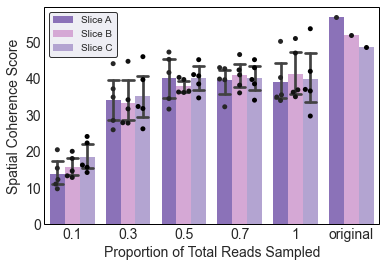

In [84]:
fig1 = plt.figure()
colors = [ "#8766c4", "#dda0dd", "#b19cd9"]

ax1 = sns.barplot(x="fraction", y = "score", hue="which_slice", data=out, ci=95, palette=sns.color_palette(colors), capsize=.2,)

plt.legend(frameon=True, edgecolor='black', fontsize = 12)
# Get the legend from just the box plot
handles, labels = ax1.get_legend_handles_labels()
ax1 = sns.swarmplot(x="fraction", y="score", hue='which_slice', color='black', dodge=True,data=out)
# Remove the old legend
ax1.legend_.remove()
# Add just the handles/labels from the box plot back
ax1.legend(
    handles,
    labels,
    loc=0, fontsize=10, frameon=True, edgecolor='black'
)
ax1.set_facecolor('white')
ax1.patch.set_edgecolor('black')
ax1.patch.set_linewidth('1')  
ax1.set_ylabel("Spatial Coherence Score", fontsize = 14)
ax1.set_xlabel("Proportion of Total Reads Sampled", fontsize = 14)
palette = sns.color_palette(n_colors= 6)

/Users/alexanderstrzalkowski/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0. , 0.2, 0.4, 0.6, 0.8]), <a list of 5 Text major ticklabel objects>)

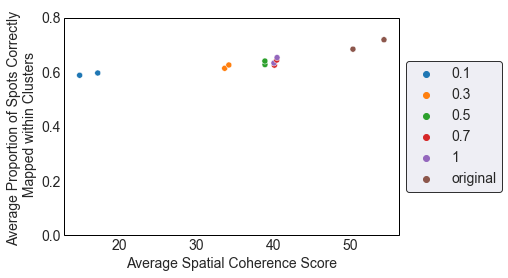

In [86]:
fig2 = plt.figure()
palette = sns.color_palette(n_colors= 6)

ax2 = sns.scatterplot(list(final_df["score"]), list(final_df["accuracy"]), hue = list(final_df["fraction"]), palette=palette)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, edgecolor='black', fontsize= 14)
ax2.set_facecolor('white')
ax2.patch.set_edgecolor('black')
ax2.patch.set_linewidth('1')  
ax2.set_ylim(0, 0.8)
ax2.set_xlabel("Average Spatial Coherence Score", fontsize = 14)
ax2.set_ylabel("Average Proportion of Spots Correctly \n Mapped within Clusters", fontsize = 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

In [88]:
# Add subfigure identifiers a., and b. respectively to figures.
import string

myaxs = [ax1, ax2]
for n, ax in enumerate(myaxs):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

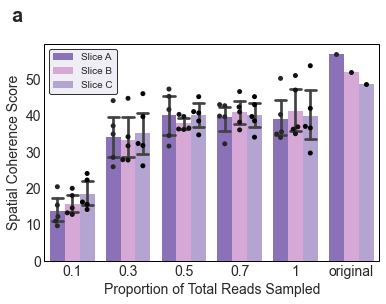

In [98]:
fig1

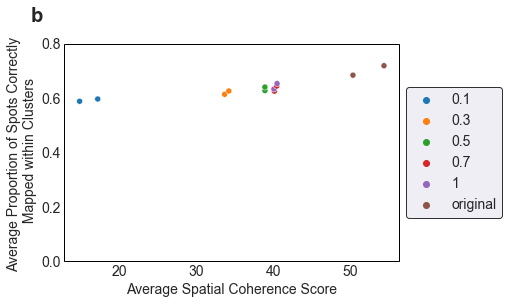

In [99]:
fig2

In [96]:
fig1.savefig("spatial-coherence-downsample-scc.png", dpi=300)

In [100]:
fig2.savefig("accuracy-downsample-scc.png", dpi=300, bbox_inches='tight')